# 泰坦尼克号生存预测——决策树CART回归树算法

## 探索数据

In [1]:
# 导入包
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
df_train = pd.read_csv(r'E:\WorkSpace\Data-Analysis\Machine Learning\Projects\DecisionTree-Titanic\train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 初步分析—可视化

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(13,10))# 设置大小
fig.set(alpha=0.3) # 设置颜色参数

# 生存人数
plt.subplot2grid((2,3),(0,0))
df_train['Survived'].value_counts().plot(kind='bar')
plt.title("Survived")
plt.ylabel('Num')

# 乘客等级
plt.subplot2grid((2,3),(0,1))
df_train['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('Num')

#年龄分布
plt.subplot2grid((2,3),(0,2))
plt.scatter(df_train['Survived'], df_train['Age'])
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title('Age')

# 年龄按等级分布
plt.subplot2grid((2,3),(1,0),colspan=2)
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')
plt.title('Pclass_all')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.legend(('1st','2nd','3rd'), loc='best')

#  各登船口上岸人数
plt.subplot2grid((2,3), (1,2))
df_train['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked')
plt.ylabel('Num')
plt.show()

<Figure size 1300x1000 with 5 Axes>

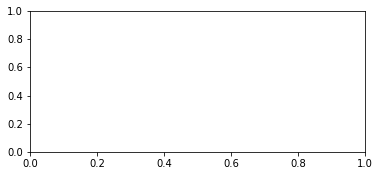

In [6]:
# subplot2grid占用格参数
plt.subplot2grid((3,3),(0,0),rowspan=2,colspan=3)

## 属性与获救关联统计

### 乘客等级与获救人数

<Figure size 432x288 with 0 Axes>

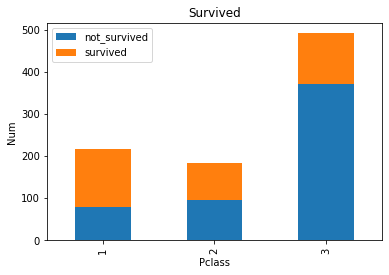

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)

survived_0 = df_train[df_train['Survived']==0]['Pclass'].value_counts()
survived_1 = df_train[df_train['Survived']==1]['Pclass'].value_counts()
df = DataFrame({'not_survived':survived_0, 'survived':survived_1})
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('Pclass')
plt.ylabel('Num')
plt.show()

### 乘客等级与获救人数

<Figure size 432x288 with 0 Axes>

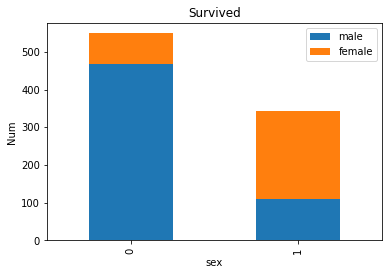

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)

survived_m = df_train[df_train['Sex']=='male']['Survived'].value_counts()
survived_f = df_train[df_train['Sex']=='female']['Survived'].value_counts()
df = DataFrame({'male':survived_m, 'female':survived_f})
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('sex')
plt.ylabel('Num')
plt.show()

### 舱等级及性别的获救情况

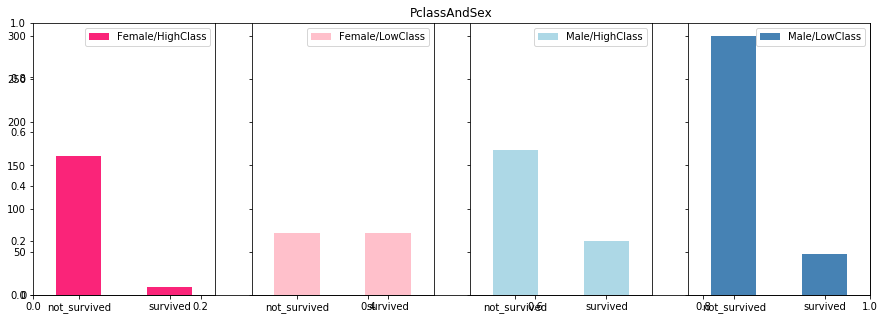

In [9]:
#各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(15,5))
fig.set(alpha=0.7) 
plt.title('PclassAndSex')

ax1=fig.add_subplot(141)
df_train[(df_train.Sex == 'female') & (df_train.Pclass != 3)]['Survived'].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["not_survived","survived" ], rotation=0)
ax1.legend(["Female/HighClass"], loc='best')

ax2=fig.add_subplot(142,sharey=ax1)
df_train[(df_train.Sex == 'female') & (df_train.Pclass == 3)]['Survived'].value_counts().plot(kind='bar', label="female, low class", color='pink')
ax2.set_xticklabels(["not_survived","survived" ], rotation=0)
ax2.legend(["Female/LowClass"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
df_train[(df_train.Sex == 'male') & (df_train.Pclass != 3)]['Survived'].value_counts().plot(kind='bar', label="male, high class", color='lightblue')
ax3.set_xticklabels(["not_survived","survived" ], rotation=0)
ax3.legend(["Male/HighClass"], loc='best')


ax4=fig.add_subplot(144, sharey=ax1)
df_train[(df_train.Sex == 'male') & (df_train.Pclass == 3)]['Survived'].value_counts().plot(kind='bar', label="male, low class", color='steelblue')
ax4.set_xticklabels(["not_survived","survived" ], rotation=0)
ax4.legend(["Male/LowClass"], loc='best')

plt.show()

### 各登陆港口的获救情况

<Figure size 360x576 with 0 Axes>

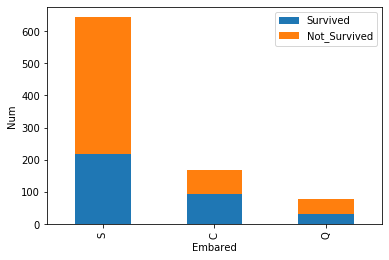

In [10]:
fig = plt.figure(figsize=(5,8))
fig.set(alpha=0.3)

survived_0 = df_train[df_train['Survived']==0]['Embarked'].value_counts()
survived_1 = df_train[df_train['Survived']==1]['Embarked'].value_counts()
df = DataFrame({'survived': survived_1,'not_survived':survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel('Embared')
plt.ylabel('Num')
plt.legend(('Survived','Not_Survived'))

## 数据预处理

### 缺失值处理思路

通常遇到缺值的情况，我们会有几种常见的处理方式：
1. 如果缺值的样本占总数比例极高，可直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果
2. 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，则把NaN作为一个新类别，加到类别特征中
3. 如果缺值的样本适中，而该属性为连续值特征属性，可考虑给定一个step(比如这里的age，可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
4. 有些情况下，缺失的值个数并不是特别多，可以试着根据已有的值，拟合一下数据，补充上。

### 利用sklearn的RandomForest拟合缺失年龄

In [11]:
from sklearn.ensemble import RandomForestRegressor

# 使用RandomForestClassifier 填补年龄缺失值
def set_missing_ages(df):
    # 已有的数值型特征添加进RandomForestRegressor中
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    # 乘客分为已知年龄和未知年龄
    known_age = age_df[age_df['Age'].notnull()].as_matrix()
    unknown_age = age_df[age_df['Age'].isnull()].as_matrix()
    #y为目标年龄
    y = known_age[:,0]
    #x为特征属性值
    x = known_age[:,1:]
    #fit到RandomForestRegressor中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x,y)
    #得到的模型进行预测
    predictAges = rfr.predict(unknown_age[:,1::])
    #得到的结果填充
    df.loc[(df['Age'].isnull()), 'Age'] = predictAges
    
    return df,rfr

In [12]:
# 初始化Cabin类别
def set_Cabin_type(df):
    df.loc[(df['Cabin'].notnull()), 'Cabin'] = 'No'
    df.loc[(df['Cabin'].isnull()), 'Cabin'] = 'Yes'
    return df

In [13]:
df_train, rfr = set_missing_ages(df_train)
df_train = set_Cabin_type(df_train)

f:\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
f:\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [15]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Yes,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,No,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Yes,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,No,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Yes,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,Yes,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,No,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Yes,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Yes,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Yes,C


### 特征因子化

In [16]:
dummies_Cabin = pd.get_dummies(df_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

In [17]:
df = pd.concat([df_train, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex], axis=1)
df.drop(['Cabin', 'Embarked', 'Pclass', 'Sex'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,1,0,0,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,1,0,1,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,1,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,1,0,0,0,1,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,1,0,0,1,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,...,0,1,0,1,0,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,...,1,0,0,0,1,1,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,...,0,1,0,0,1,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,...,0,1,0,0,1,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,...,0,1,1,0,0,0,1,0,1,0


### 特征归一化

In [18]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()


In [19]:
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,0,1,0,0,1,0,1,-0.561380,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,1,0,0.613171,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,1,0,-0.267742,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,0,1,1,0,0,1,0,0.392942,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,0,1,0,0,1,0,1,0.392942,-0.486337
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,...,0,1,0,0,0,1,0,1,-0.426384,-0.478116
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,...,0,0,1,1,0,0,0,1,1.787722,0.395814
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,...,0,0,1,0,0,1,0,1,-2.029569,-0.224083
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,...,0,0,1,0,0,1,1,0,-0.194333,-0.424256
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,...,1,0,0,0,1,0,1,0,-1.148655,-0.042956


## 决策树建模 